# Cardiac - Constrained

In [1]:
%pylab inline

import sigpy as sp
from demo_cardiac_consensus import *

import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\boldmath'
markers = Line2D.filled_markers
mpl.rc('font', weight='bold')

Populating the interactive namespace from numpy and matplotlib


In [2]:
trj = np.load("data/cardiac/trj.npy").real

In [3]:
cg_time = [np.load("results/cardiac_consensus/cg_nn_%02d/time.npy" % elm) for elm in cg_num_normal]
cg_obj  = [np.load("results/cardiac_consensus/cg_nn_%02d/obj.npy"  % elm) for elm in cg_num_normal] 
cg_rec  = [np.load("results/cardiac_consensus/cg_nn_%02d/iter_%03d.npy" % (elm, num_iters - 1)) for elm in cg_num_normal]

In [4]:
pi_time = [np.load("results/cardiac_consensus/pi_nn_%02d/time.npy" % elm) for elm in pi_num_normal]
pi_obj  = [np.load("results/cardiac_consensus/pi_nn_%02d/obj.npy"  % elm) for elm in pi_num_normal]
pi_rec  = [np.load("results/cardiac_consensus/pi_nn_%02d/iter_%03d.npy" % (elm, num_iters - 1)) for elm in pi_num_normal]

In [5]:
max_time = max([elm.max() for elm in cg_time] + [elm.max() for elm in pi_time])

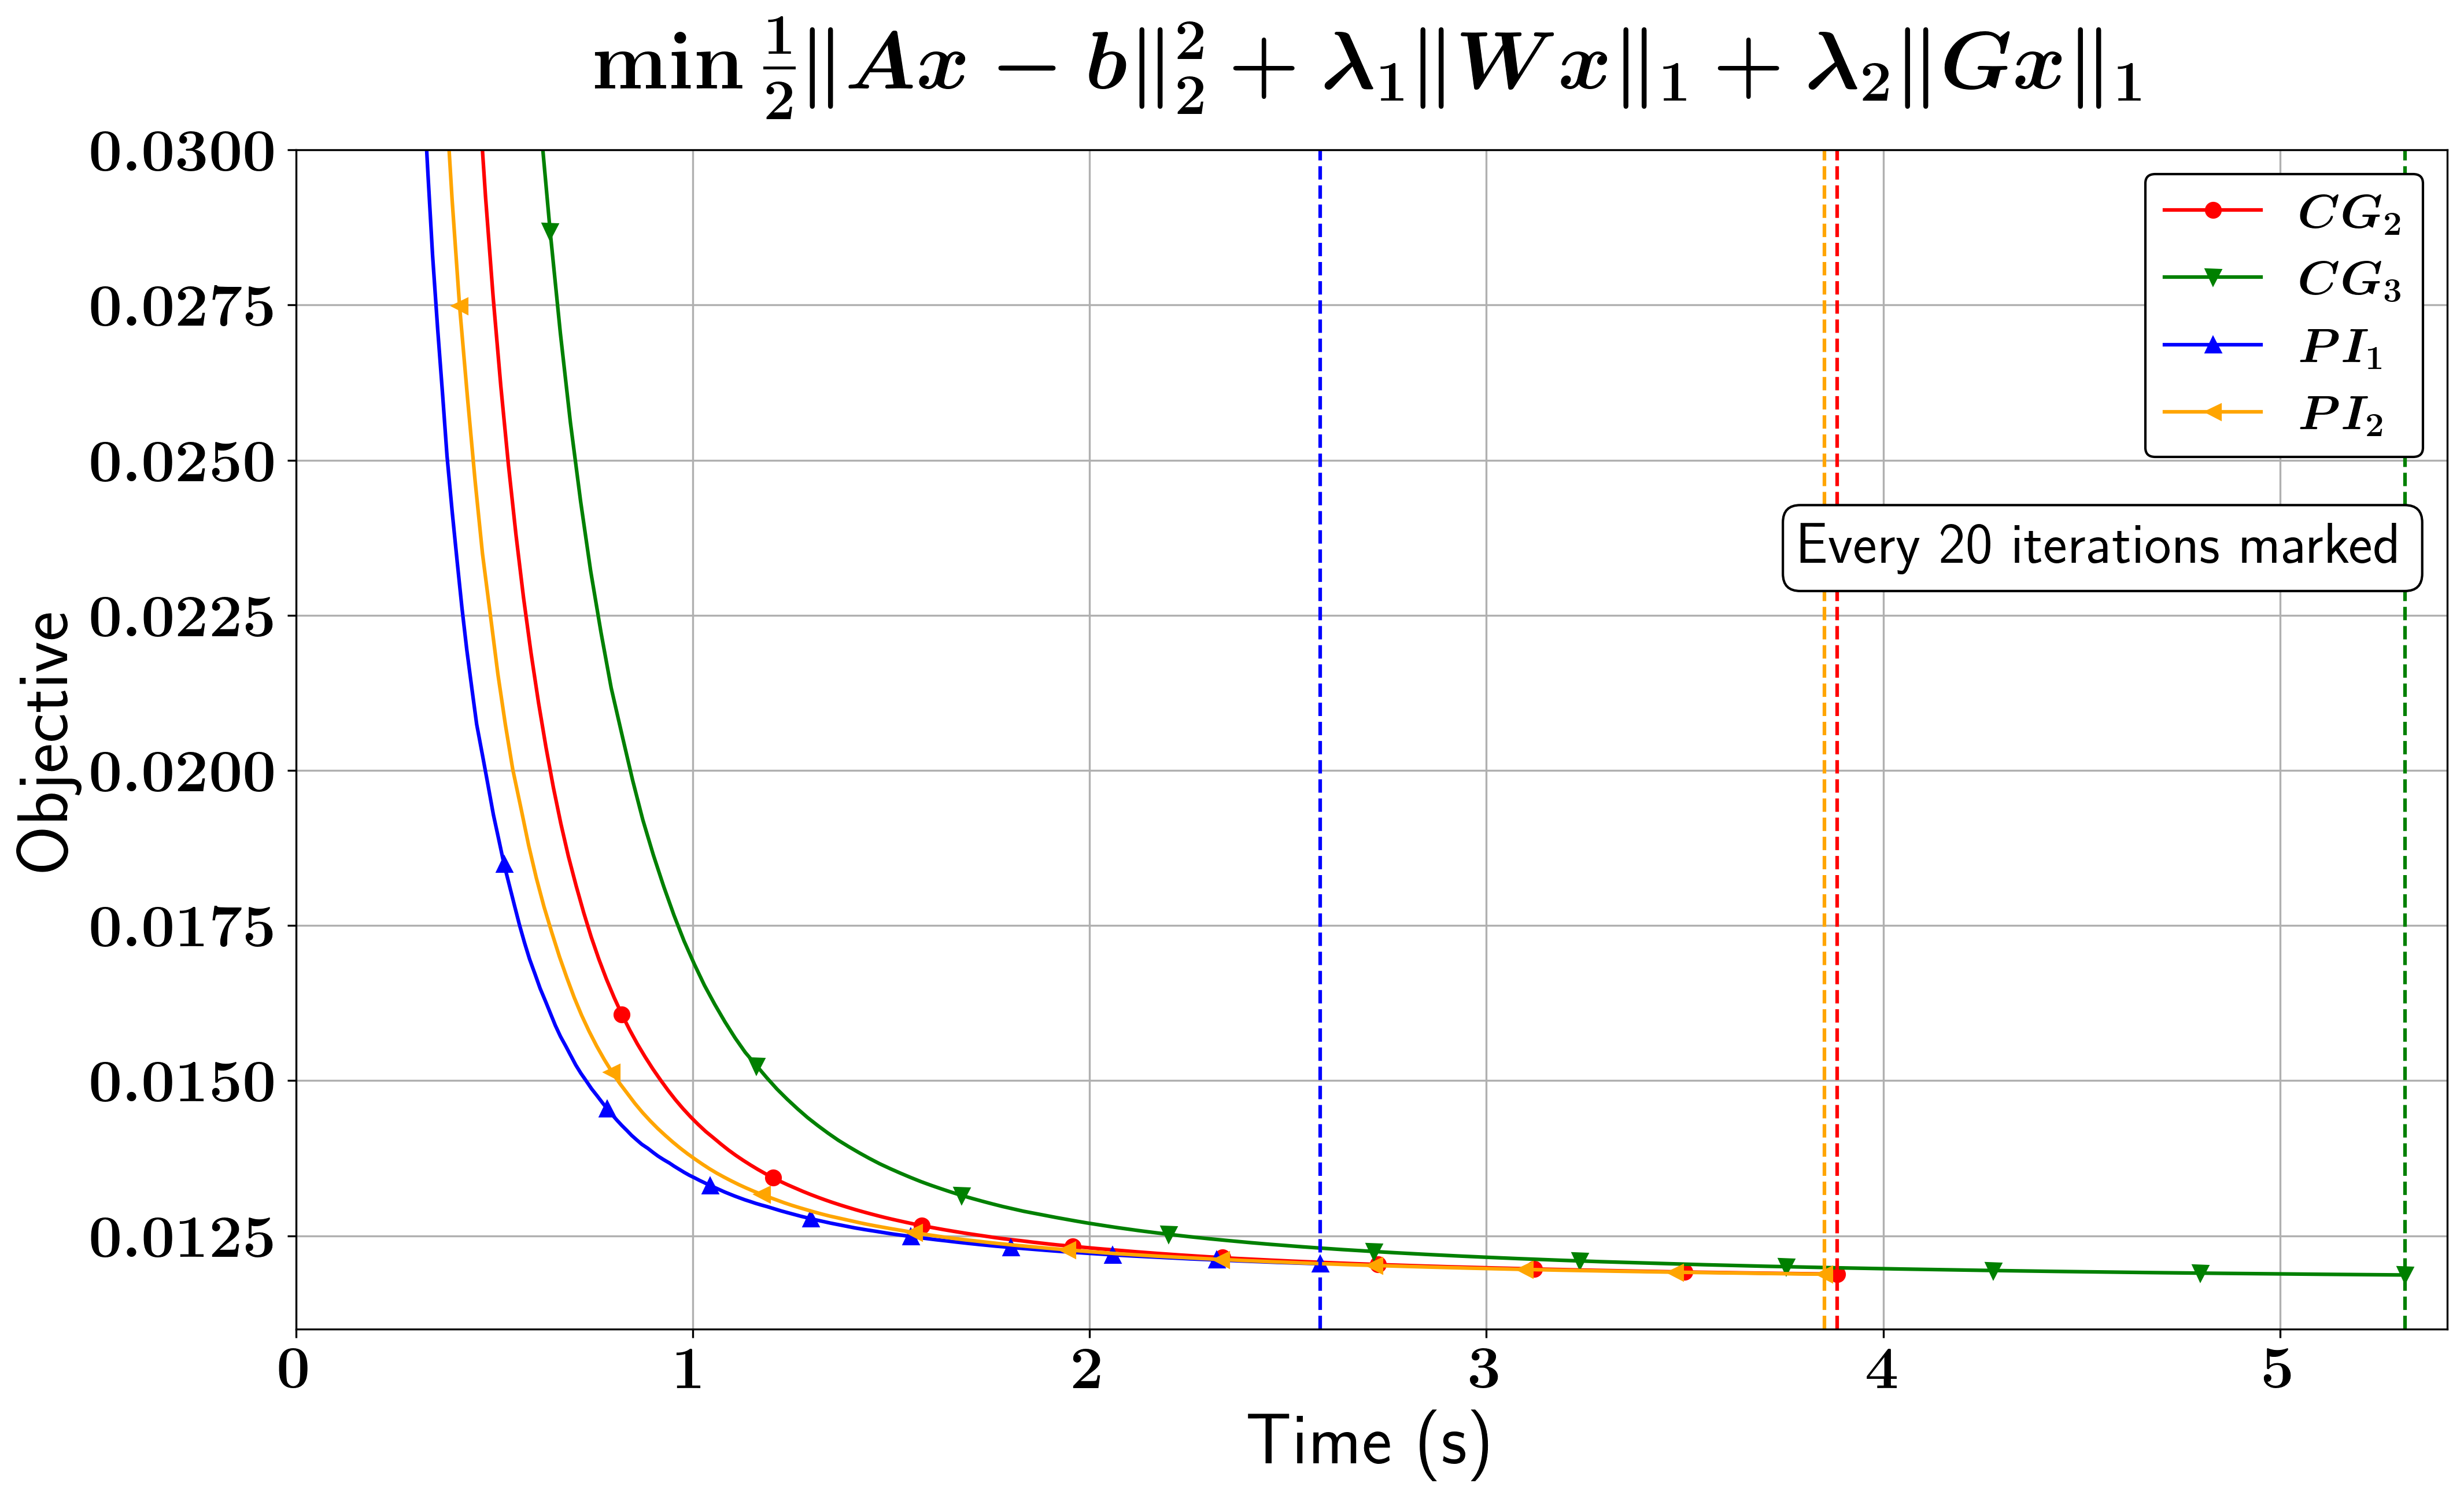

In [6]:
(fig, ax) = plt.subplots(1, 1, figsize=(16, 9), dpi=300)

markevery=(num_iters-1)//10
alpha = 0.7

colors = ["red", "green", "blue", "orange"]

legend = []
for k in range(len(cg_num_normal)):
    ax.plot(cg_time[k], cg_obj[k], marker=markers[k], markevery=markevery, color=colors[k])
    legend.append(r"$\boldsymbol{CG_{%d}}$" % cg_num_normal[k])
    
for k in range(len(pi_num_normal)):
    ax.plot(pi_time[k], pi_obj[k], marker=markers[k + len(cg_num_normal)], markevery=markevery, color=colors[k + len(cg_num_normal)])
    legend.append(r"$\boldsymbol{PI_{%d}}$" % pi_num_normal[k])

ax.set_xlabel("Time (s)", fontsize=30)
ax.set_ylabel(r"Objective", fontsize=30)

ax.legend(legend, fontsize=20, edgecolor="black", facecolor="white", loc="upper right", framealpha=1)

for k in range(len(cg_num_normal)):
    ax.axvline(x=cg_time[k][-1], color=colors[k], linestyle="--", label="")
    
for k in range(len(pi_num_normal)):
    ax.axvline(x=pi_time[k][-1], color=colors[k + len(cg_num_normal)], linestyle="--", label=None)

#ax.set_yscale("log")
ax.set_ylim([0.011, 0.03])

ax.grid()

ax.set_xlim([0, max_time * 1.02])

ax.tick_params(labelsize=25)

fig.text(0.667, 0.625, "Every %d iterations marked" % markevery, va='center', rotation='horizontal', fontsize=24, bbox=dict(facecolor="w", edgecolor="black", boxstyle='round'))

plt.title(r"$\min \frac{1}{2}\lVert A x - b \rVert_2^2 + \lambda_1 \lVert Wx \rVert_1 + \lambda_2 \lVert G x \rVert_1$", fontsize=34, y=1.04);

plt.savefig('figures/cardiac_m.png')
!convert -trim figures/cardiac_m.png figures/cardiac_m.png

Done.